# Taxi Trip Analysis (Data Science Project)

Business Goal: **Meningkatkan** pendapatan tip driver

Deskripsi Background

In [14]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('taxi_trip.csv')
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [17]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


# Data Cleaning

**1. Missing Value**

In [18]:
print(df.isnull().sum())

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


Tidak ada missing values

**2. Unique Value**

Check Unique Value

In [19]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0: 22699 distinct values
VendorID: 2 distinct values
tpep_pickup_datetime: 22687 distinct values
tpep_dropoff_datetime: 22688 distinct values
passenger_count: 7 distinct values
trip_distance: 1545 distinct values
RatecodeID: 6 distinct values
store_and_fwd_flag: 2 distinct values
PULocationID: 152 distinct values
DOLocationID: 216 distinct values
payment_type: 4 distinct values
fare_amount: 185 distinct values
extra: 6 distinct values
mta_tax: 3 distinct values
tip_amount: 742 distinct values
tolls_amount: 38 distinct values
improvement_surcharge: 3 distinct values
total_amount: 1369 distinct values


**Duplicate Value**

In [20]:
df[df.duplicated()]
## bisa juga pakai df.duplicated untuk liat True or False

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount


**Ubah Tipe Data Pickup & Time Dropoff Time Menjadi Datetime**

In [21]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

**Membuat Kolom Baru**

In [22]:
df['duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).dt.total_seconds()/3600
df['hour']=df['tpep_pickup_datetime'].dt.strftime('%-I:%M %p')
df['month']=df['tpep_pickup_datetime'].dt.month_name()
df['day']=df['tpep_pickup_datetime'].dt.day_name()
df['speed']=df['trip_distance']/df['duration']

**Drop Kolom yang tidak diperlukan**

In [23]:
columns_drop=["Unnamed: 0",'store_and_fwd_flag','PULocationID','DOLocationID']
df.drop(columns_drop, axis=1, inplace=True)

**Outlier Removal**

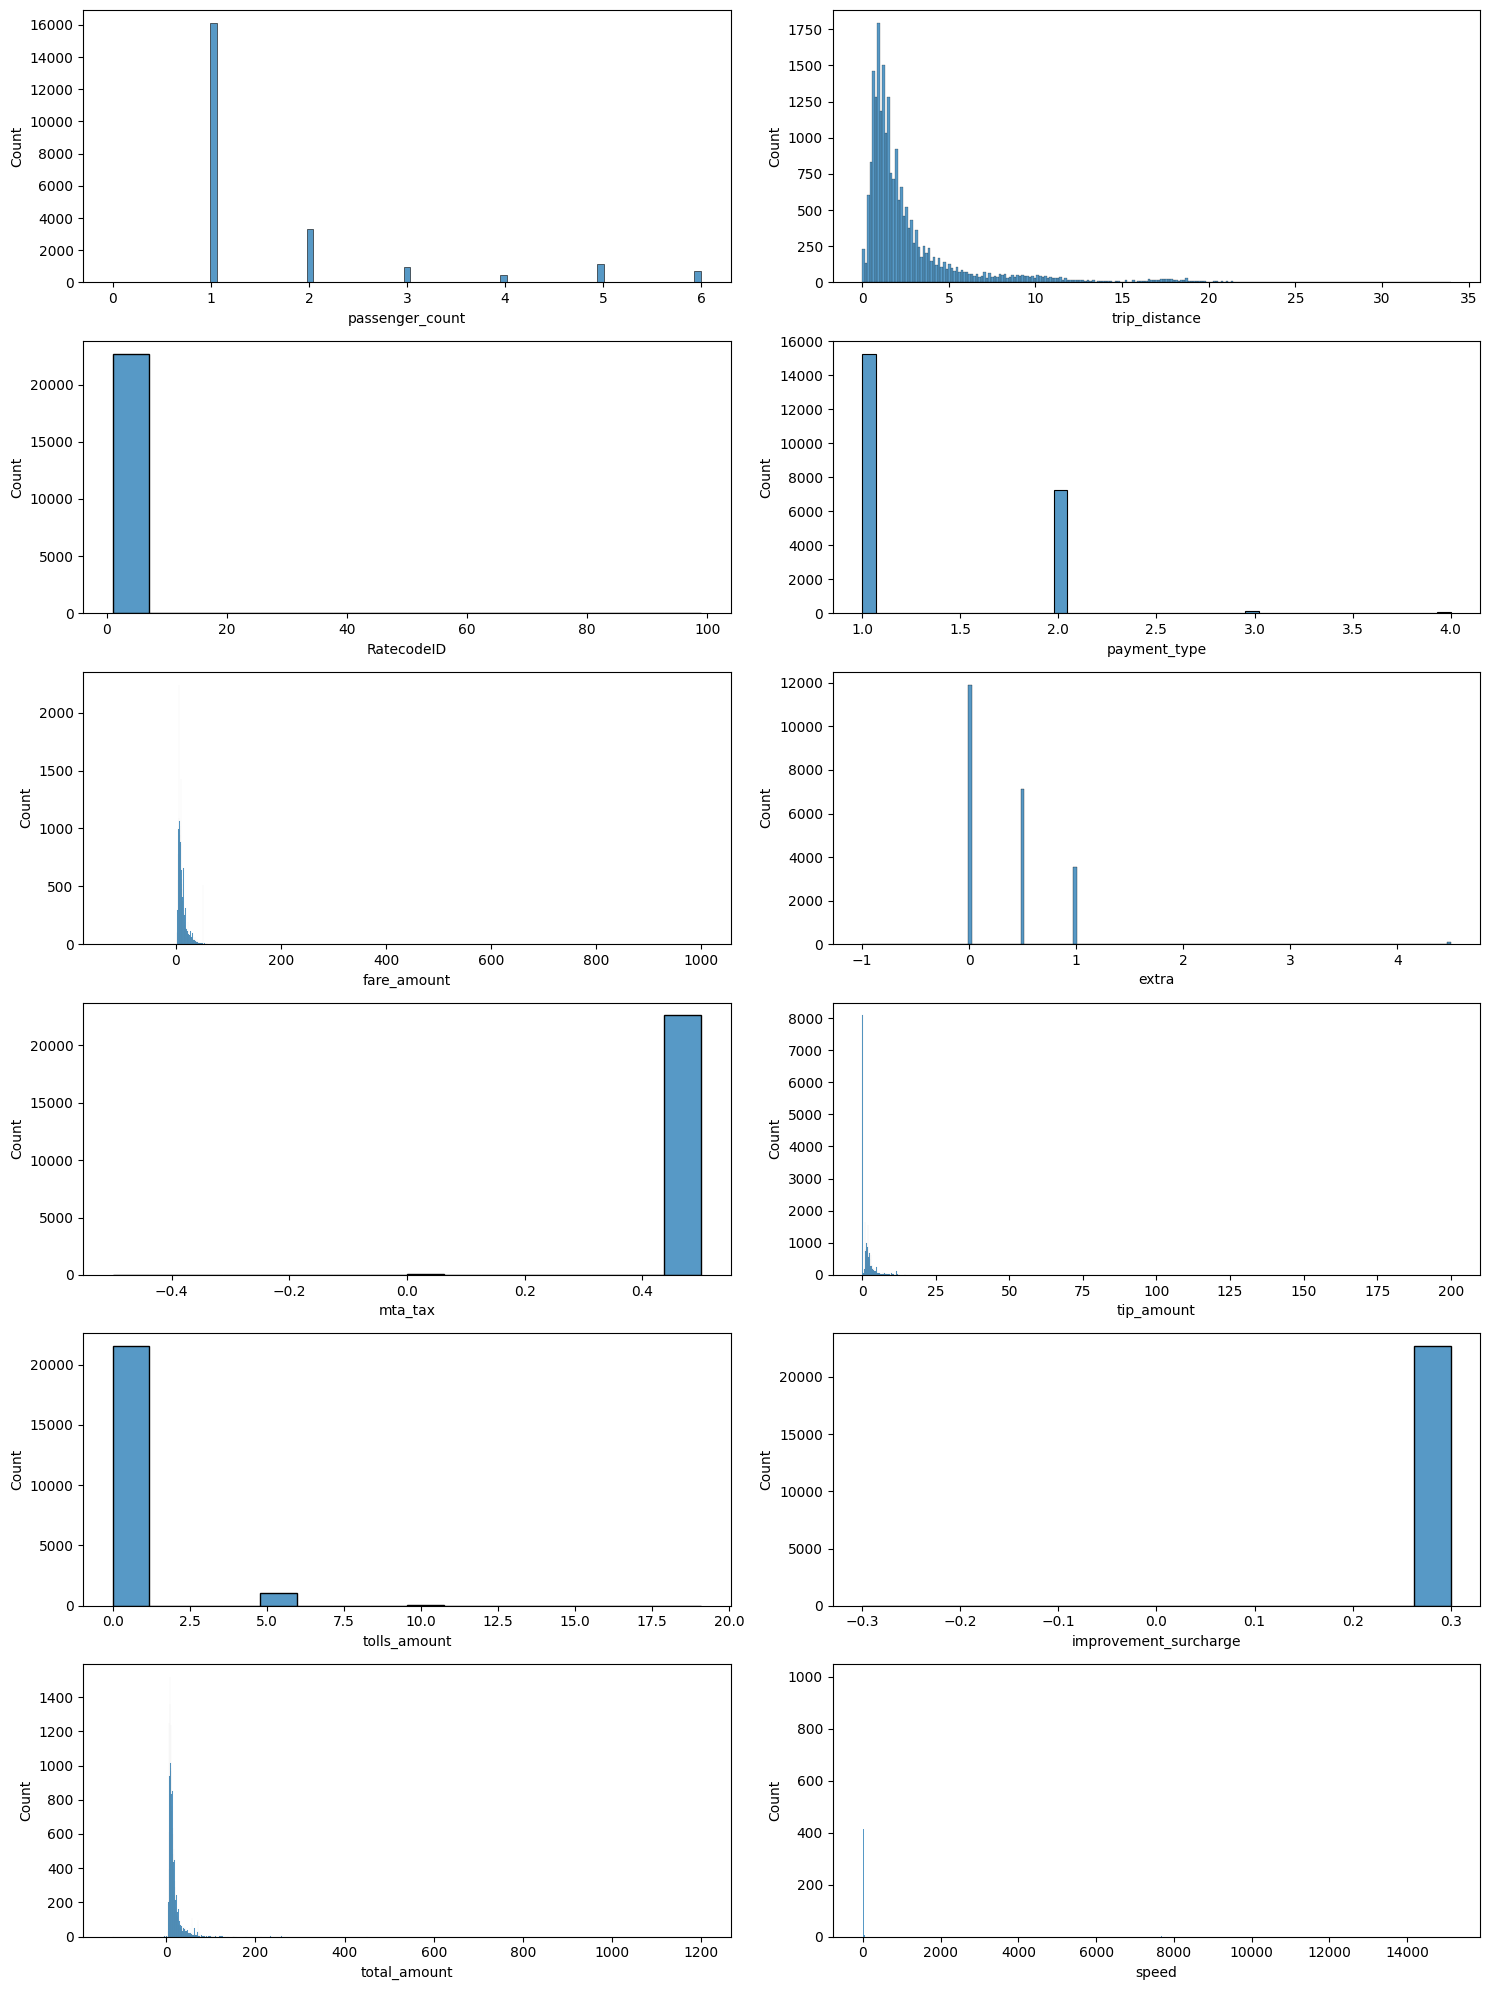

In [24]:
fig,axes=plt.subplots(6,2,figsize=(15,20))
sns.histplot(ax=axes[0,0],x=df['passenger_count'])
sns.histplot(ax=axes[0,1],x=df['trip_distance'])
sns.histplot(ax=axes[1,0],x=df['RatecodeID'])
sns.histplot(ax=axes[1,1],x=df['payment_type'])
sns.histplot(ax=axes[2,0],x=df['fare_amount'])
sns.histplot(ax=axes[2,1],x=df['extra'])
sns.histplot(ax=axes[3,0],x=df['mta_tax'])
sns.histplot(ax=axes[3,1],x=df['tip_amount'])
sns.histplot(ax=axes[4,0],x=df['tolls_amount'])
sns.histplot(ax=axes[4,1],x=df['improvement_surcharge'])
sns.histplot(ax=axes[5,0],x=df['total_amount'])
sns.histplot(ax=axes[5,1],x=df['speed'])
plt.tight_layout()
plt.show()

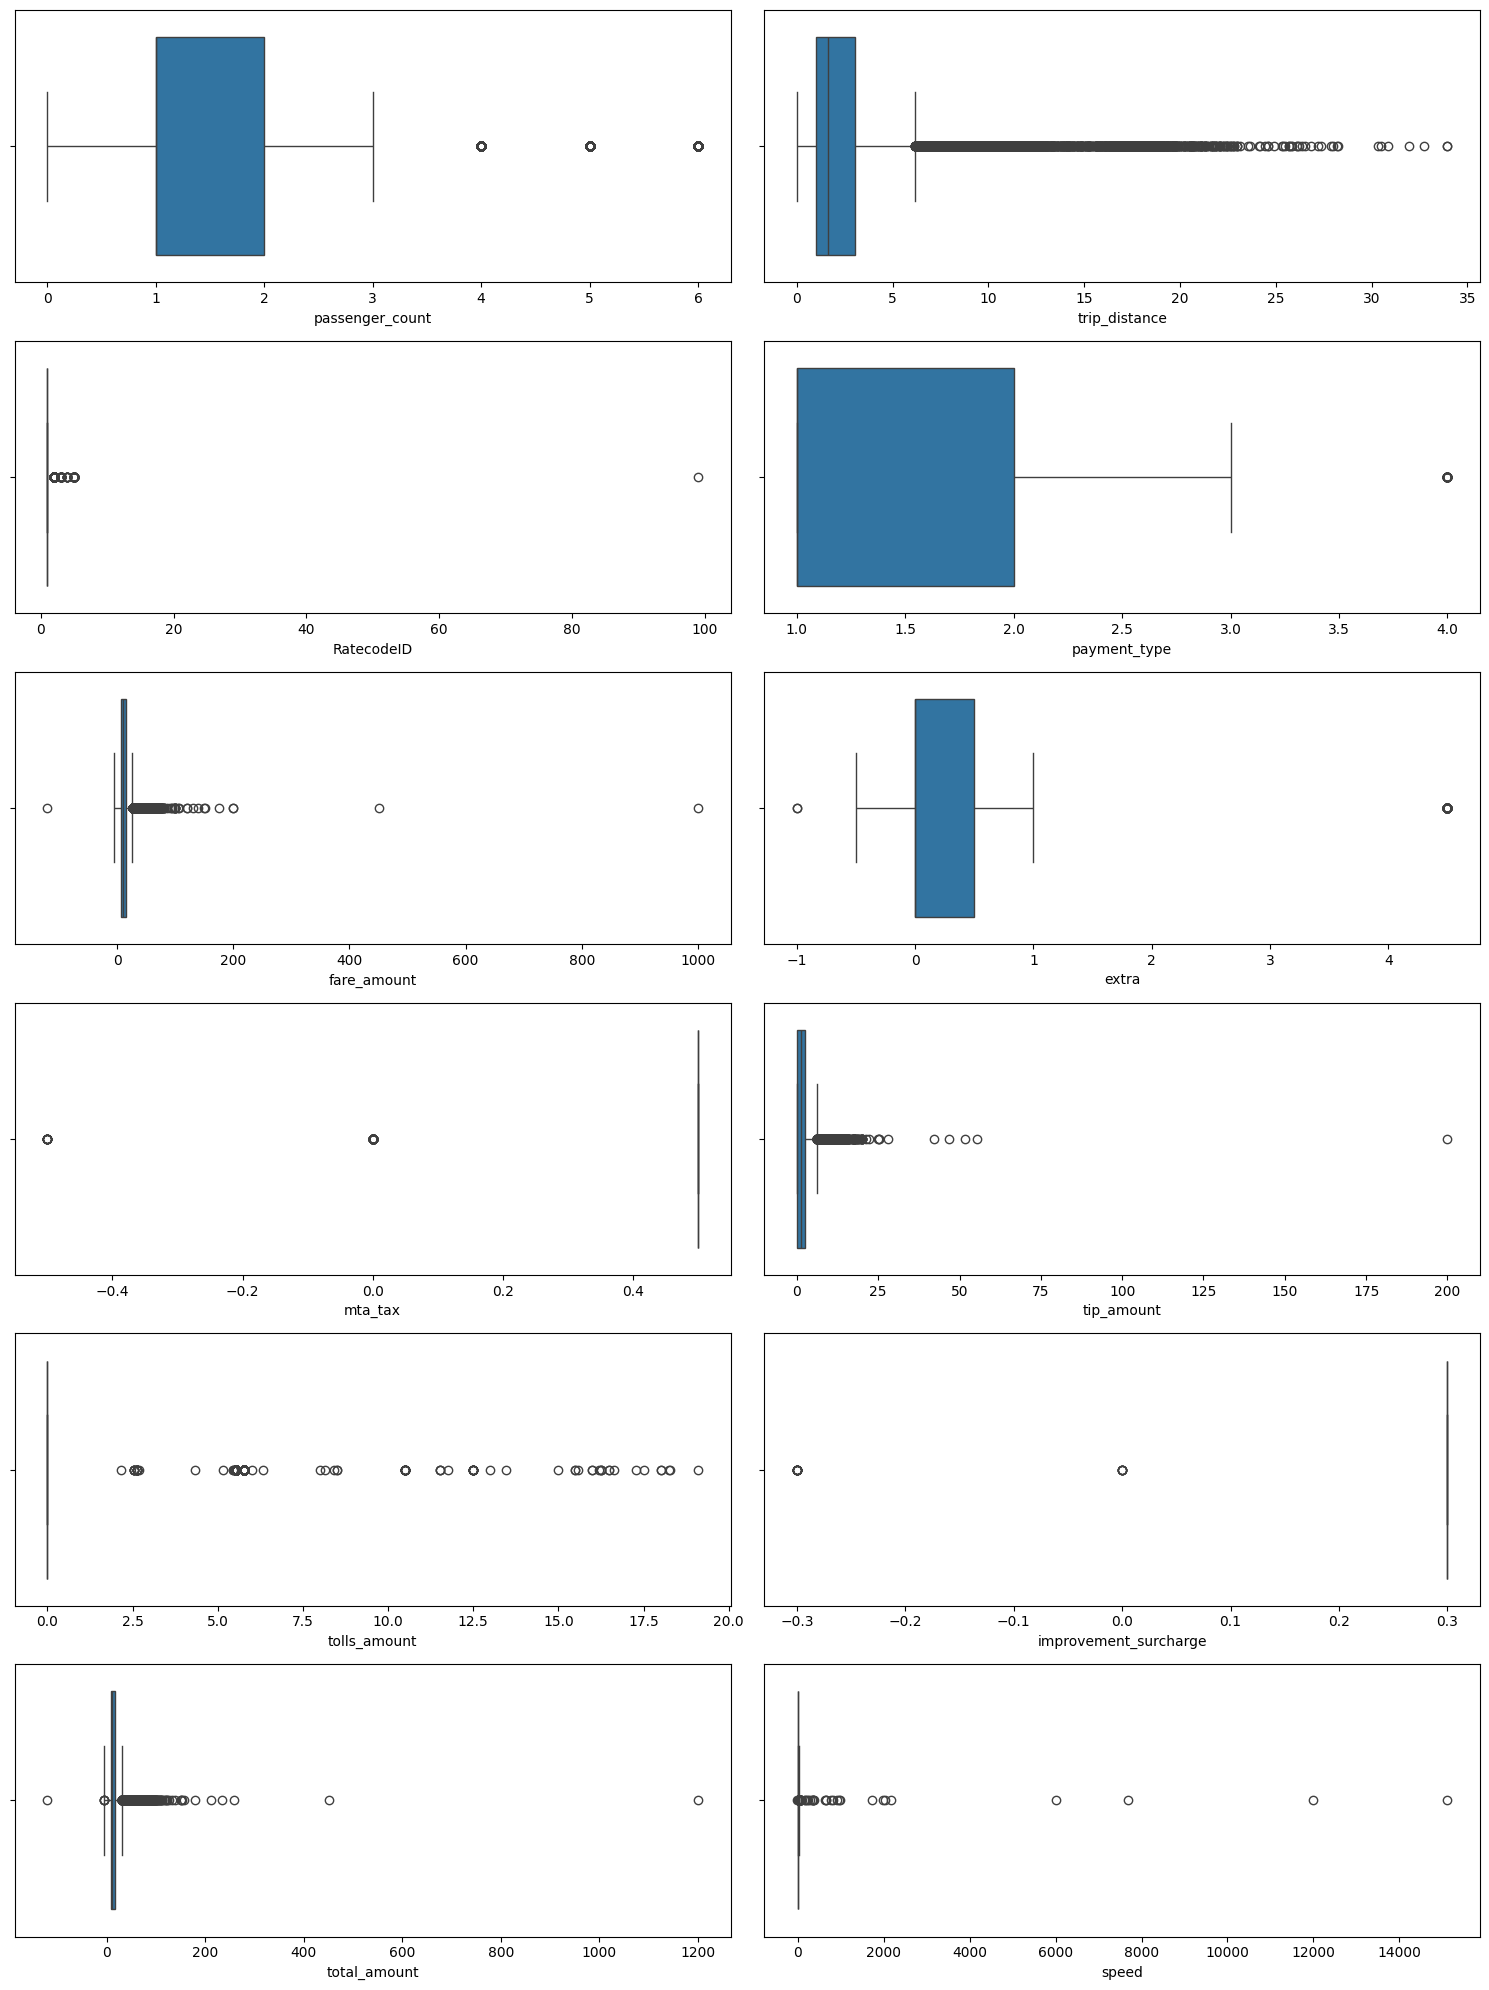

In [25]:
fig,axes=plt.subplots(6,2,figsize=(15,20))
sns.boxplot(ax=axes[0,0],x=df['passenger_count'])
sns.boxplot(ax=axes[0,1],x=df['trip_distance'])
sns.boxplot(ax=axes[1,0],x=df['RatecodeID'])
sns.boxplot(ax=axes[1,1],x=df['payment_type'])
sns.boxplot(ax=axes[2,0],x=df['fare_amount'])
sns.boxplot(ax=axes[2,1],x=df['extra'])
sns.boxplot(ax=axes[3,0],x=df['mta_tax'])
sns.boxplot(ax=axes[3,1],x=df['tip_amount'])
sns.boxplot(ax=axes[4,0],x=df['tolls_amount'])
sns.boxplot(ax=axes[4,1],x=df['improvement_surcharge'])
sns.boxplot(ax=axes[5,0],x=df['total_amount'])
sns.boxplot(ax=axes[5,1],x=df['speed'])
plt.tight_layout()
plt.show()

Pada **Outlier Detection**, ditemukan:
1.   passenger_count: ada baris yang bernilai 0
2.   trip_distance: ada baris yang bernilai 0
1.   RatecodeID: angka maksimum adalah 99 (tidak benar)
2.   payment_type: -
1.   fare_amount: ada baris yang bernilai negatif dan 0
2.   extra: ada nilai negatif, angka maksimum 5 (tidak benar)
1.   mta_tax: ada nilai negatif dan 0
2.   tolls_amount: -
1.   total_amount: ada nilai negatif
2.   improvement_surcharge: ada nilai 0
1.   duration: ada nilai negatif
2.   speed: ada nilai yang tidak masuk akal untuk pengendara taksi
















**Assumption:**
Ada error ketika memasukkan data, data negatif perlu diubah menjadi positif.

In [26]:
negative_to_positive=['fare_amount','extra','mta_tax','improvement_surcharge','duration','speed']
df[negative_to_positive]=df[negative_to_positive].abs()

In [27]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,speed
count,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22673.000000
mean,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,1.336887,13.041035,0.333759,0.498018,1.835781,0.312542,0.299921,16.310502,0.283588,13.774874
min,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-120.300000,0.000000,0.000000
25%,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,0.110833,7.248322
50%,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,0.186389,9.837838
75%,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,0.306389,13.604651
max,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,23.992500,15120.000000
std,0.496838,NaN,NaN,1.285231,3.653171,0.708391,0.496211,13.229605,0.462747,0.031422,2.800626,1.399212,0.004877,16.097295,1.033268,146.862248


In [28]:
print((df['RatecodeID']==99).sum())
print((df['passenger_count']==0).sum())
print((df['extra']==4.5).sum())
print((df['trip_distance']==0).sum())
print((df['fare_amount']==0).sum())

1
33
101
148
6


**Mengganti nilai 0 pada  mta_tax value dan improvement surcharge**

In [29]:
df['mta_tax']=df['mta_tax'].replace(0,0.5)
df['improvement_surcharge']=df['improvement_surcharge'].replace(0,0.3)

In [30]:
df = df[df['passenger_count'] != 0]


1.   extra 4.5 adalah outlier yang sangat jauh





In [31]:
df = df[df['extra'] != 4.5]

In [32]:
print((df['RatecodeID']==99).sum())
print((df['passenger_count']==0).sum())
print((df['extra']==4.5).sum())
print((df['trip_distance']==0).sum())
print((df['fare_amount']==0).sum())

0
0
0
145
6


In [33]:
df[df['fare_amount']==0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,hour,month,day,speed
4402,2,2017-12-20 16:06:53,2017-12-20 16:47:50,1,7.06,1,2,0.0,0.0,0.5,0.0,0.0,0.3,0.0,0.682500,4:06 PM,December,Wednesday,10.344322
5722,2,2017-06-12 12:08:55,2017-06-12 12:08:57,1,0.00,1,1,0.0,0.0,0.5,0.0,0.0,0.3,0.0,0.000556,12:08 PM,June,Monday,0.000000
10506,2,2017-03-30 03:14:26,2017-03-30 03:14:28,1,0.00,1,1,0.0,0.0,0.5,0.0,0.0,0.3,0.0,0.000556,3:14 AM,March,Thursday,0.000000
19067,1,2017-07-10 14:40:09,2017-07-10 14:40:59,1,0.10,5,3,0.0,0.0,0.5,0.0,0.0,0.3,0.3,0.013889,2:40 PM,July,Monday,7.200000
21842,1,2017-04-18 16:55:29,2017-04-18 18:29:44,2,20.40,5,3,0.0,0.0,0.5,0.0,12.5,0.3,12.8,1.570833,4:55 PM,April,Tuesday,12.986737
22566,2,2017-03-07 02:24:47,2017-03-07 02:24:50,1,0.00,1,1,0.0,0.0,0.5,0.0,0.0,0.3,0.0,0.000833,2:24 AM,March,Tuesday,0.000000


type of payment 3 (no charge) dengan asumsi terdapat promo tetapi berdasarkan trend dari data yang ada bahwa yang jaraknya lebih kecil atau durasi lebih kecil tetap ada fare amount maka kemungkinan error (begitu juga dengan data yang lain)

In [34]:
df=df[df['fare_amount']!=0]

In [35]:
df=df[df['trip_distance']!=0]
df['total_amount']=df['fare_amount']+df['extra']+df['improvement_surcharge']+df['mta_tax']+df['tip_amount']

In [36]:
df=df[df['fare_amount']!=999.99]
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,speed
count,22416.000000,22416,22416,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.000000,22416.0,22416.000000,22416.000000,2.241600e+04,22416.000000,22416.000000,22416.000000
mean,1.557771,2017-06-29 03:59:05.854657280,2017-06-29 04:15:59.598947072,1.645967,2.869836,1.027837,1.334092,12.761069,0.315511,0.5,1.797318,0.291527,3.000000e-01,15.673898,0.281621,13.805690
min,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,1.000000,0.010000,1.000000,1.000000,0.010000,0.000000,0.5,0.000000,0.000000,3.000000e-01,0.810000,0.000278,0.007308
25%,1.000000,2017-03-30 04:00:31.500000,2017-03-30 04:04:23.500000,1.000000,1.000000,1.000000,1.000000,6.500000,0.000000,0.5,0.000000,0.000000,3.000000e-01,8.750000,0.111875,7.287449
50%,2.000000,2017-06-23 10:23:04,2017-06-23 10:44:08.500000,1.000000,1.620000,1.000000,1.000000,9.500000,0.000000,0.5,1.360000,0.000000,3.000000e-01,11.800000,0.186667,9.846154
75%,2.000000,2017-10-01 17:37:01,2017-10-01 17:46:36.750000128,2.000000,3.030000,1.000000,2.000000,14.500000,0.500000,0.5,2.360000,0.000000,3.000000e-01,17.760000,0.305000,13.568731
max,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,5.000000,4.000000,200.010000,1.000000,0.5,55.500000,19.100000,3.000000e-01,252.450000,23.992500,15120.000000
std,0.496662,NaN,NaN,1.286079,3.529736,0.222795,0.492685,10.560921,0.370312,0.0,2.363314,1.352326,1.167426e-13,12.108400,1.026349,147.675425


Karena jenis kendaraan adalah taksi maka kemungkinan maksimum kecepatan adalah 87 miles per hour atau setara dengan 128 km per jam

In [37]:
df=df[df['speed']<=80]

In [38]:
df[(df['duration'] >= 10) & (df['speed'] <= 1)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,hour,month,day,speed
697,2,2017-06-10 21:55:01,2017-06-11 21:45:51,1,1.36,1,1,8.5,0.5,0.5,1.47,0.00,0.3,11.27,23.847222,9:55 PM,June,Saturday,0.057030
924,2,2017-02-09 23:24:58,2017-02-10 23:24:31,5,4.86,1,1,17.5,0.5,0.5,0.00,0.00,0.3,18.80,23.992500,11:24 PM,February,Thursday,0.202563
1010,2,2017-12-08 07:17:20,2017-12-09 07:07:22,1,0.33,1,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,23.833889,7:17 AM,December,Friday,0.013846
1199,2,2017-11-12 19:52:44,2017-11-13 19:37:35,1,4.14,1,1,18.0,0.0,0.5,3.76,0.00,0.3,22.56,23.747500,7:52 PM,November,Sunday,0.174334
1355,2,2017-04-17 21:26:49,2017-04-18 20:46:13,6,4.09,1,2,15.0,0.5,0.5,0.00,0.00,0.3,16.30,23.323333,9:26 PM,April,Monday,0.175361
1758,2,2017-12-28 23:58:24,2017-12-29 23:38:45,1,1.23,1,1,7.0,0.5,0.5,1.66,0.00,0.3,9.96,23.672500,11:58 PM,December,Thursday,0.051959
4600,2,2017-12-20 08:24:34,2017-12-21 07:39:27,4,1.26,1,2,10.0,0.0,0.5,0.00,0.00,0.3,10.80,23.248056,8:24 AM,December,Wednesday,0.054198
5370,2,2017-12-13 19:40:05,2017-12-14 19:31:09,3,0.93,1,1,12.0,1.0,0.5,2.07,0.00,0.3,15.87,23.851111,7:40 PM,December,Wednesday,0.038992
5478,2,2017-09-19 13:16:13,2017-09-20 12:36:12,1,0.62,1,2,5.5,0.0,0.5,0.00,0.00,0.3,6.30,23.333056,1:16 PM,September,Tuesday,0.026572
6751,2,2017-06-14 11:51:18,2017-06-15 11:49:20,5,2.93,1,2,18.5,0.0,0.5,0.00,0.00,0.3,19.30,23.967222,11:51 AM,June,Wednesday,0.122250


Terdapat perjalanan 23 jam dengan kecepatan dibawah 1 maka akan dihapus karena tidak masuk akal

In [39]:
df=df[~((df['duration'] >= 10) & (df['speed'] <= 1))]
df=df[~((df['duration'] >= 4) & (df['speed'] >= 1))]

In [40]:
df_cleaned=df.copy()

# Exploratory Data Analysis

In [41]:
df_cleaned

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,hour,month,day,speed
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,0.234444,8:55 AM,March,Saturday,14.246445
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,0.441667,2:53 PM,April,Tuesday,4.075472
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,0.120000,7:26 AM,December,Friday,8.333333
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,0.504167,1:17 PM,May,Sunday,7.338843
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,0.278611,11:32 PM,April,Saturday,15.684945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,0.054444,5:37 PM,February,Friday,11.204082
22695,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,1,52.0,0.0,0.5,14.64,5.76,0.3,67.44,0.680000,4:43 PM,August,Sunday,24.573529
22696,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,0.068889,2:54 PM,September,Monday,6.096774
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,0.198889,12:56 PM,July,Saturday,11.865922


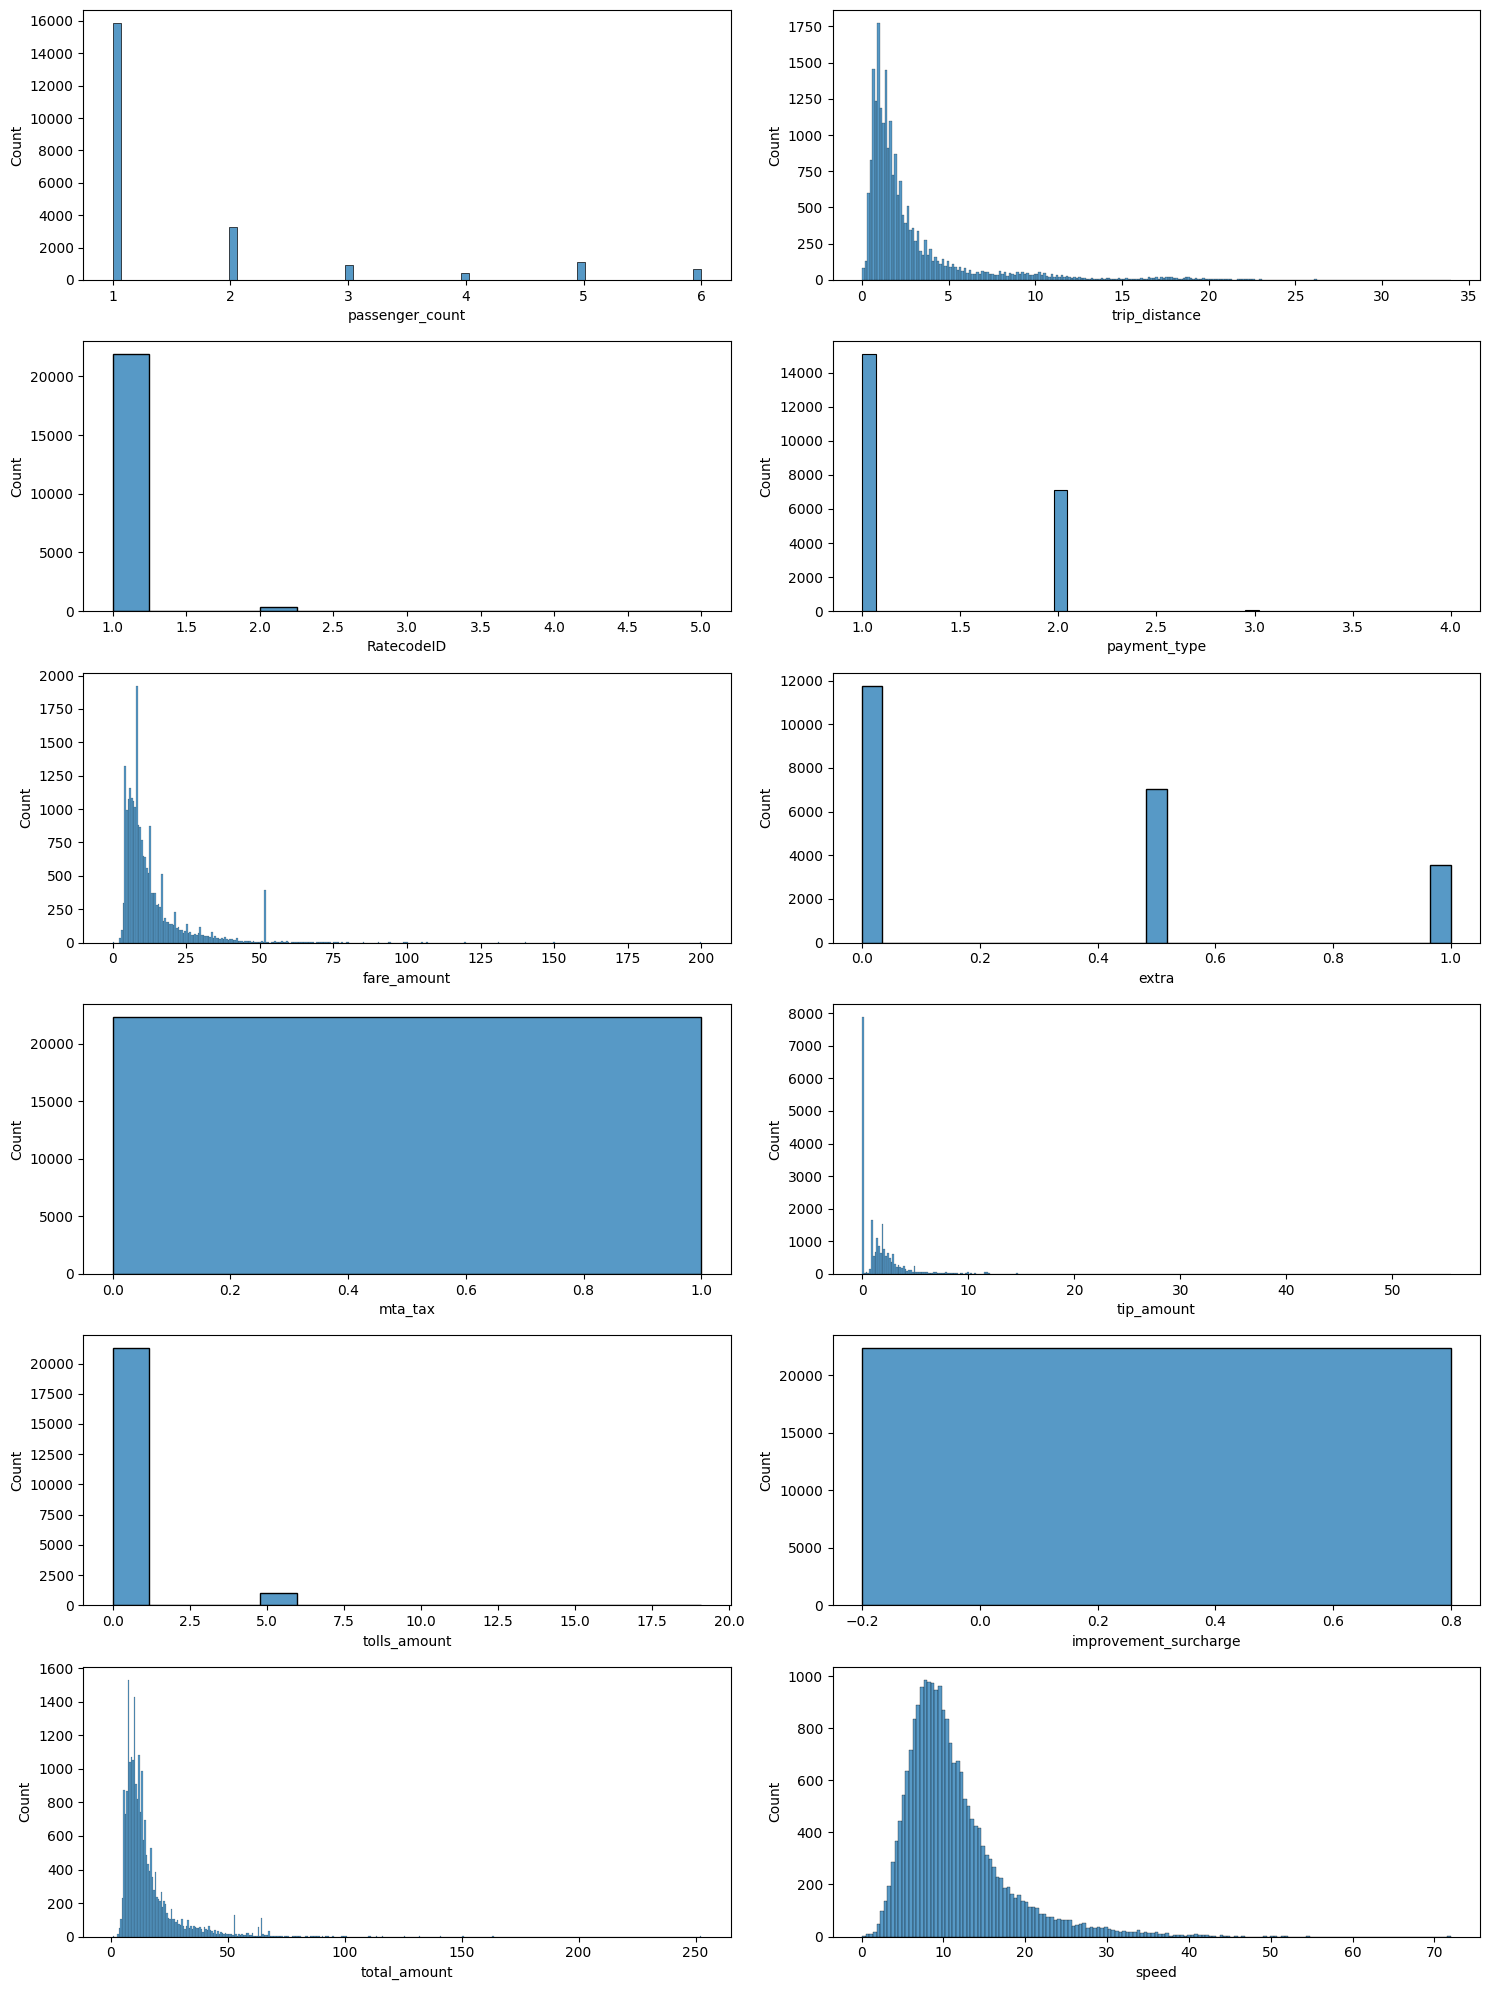

In [42]:
fig,axes=plt.subplots(6,2,figsize=(15,20))
sns.histplot(ax=axes[0,0],x=df_cleaned['passenger_count'])
sns.histplot(ax=axes[0,1],x=df_cleaned['trip_distance'])
sns.histplot(ax=axes[1,0],x=df_cleaned['RatecodeID'])
sns.histplot(ax=axes[1,1],x=df_cleaned['payment_type'])
sns.histplot(ax=axes[2,0],x=df_cleaned['fare_amount'])
sns.histplot(ax=axes[2,1],x=df_cleaned['extra'])
sns.histplot(ax=axes[3,0],x=df_cleaned['mta_tax'])
sns.histplot(ax=axes[3,1],x=df_cleaned['tip_amount'])
sns.histplot(ax=axes[4,0],x=df_cleaned['tolls_amount'])
sns.histplot(ax=axes[4,1],x=df_cleaned['improvement_surcharge'])
sns.histplot(ax=axes[5,0],x=df_cleaned['total_amount'])
sns.histplot(ax=axes[5,1],x=df_cleaned['speed'])
plt.tight_layout()
plt.show()

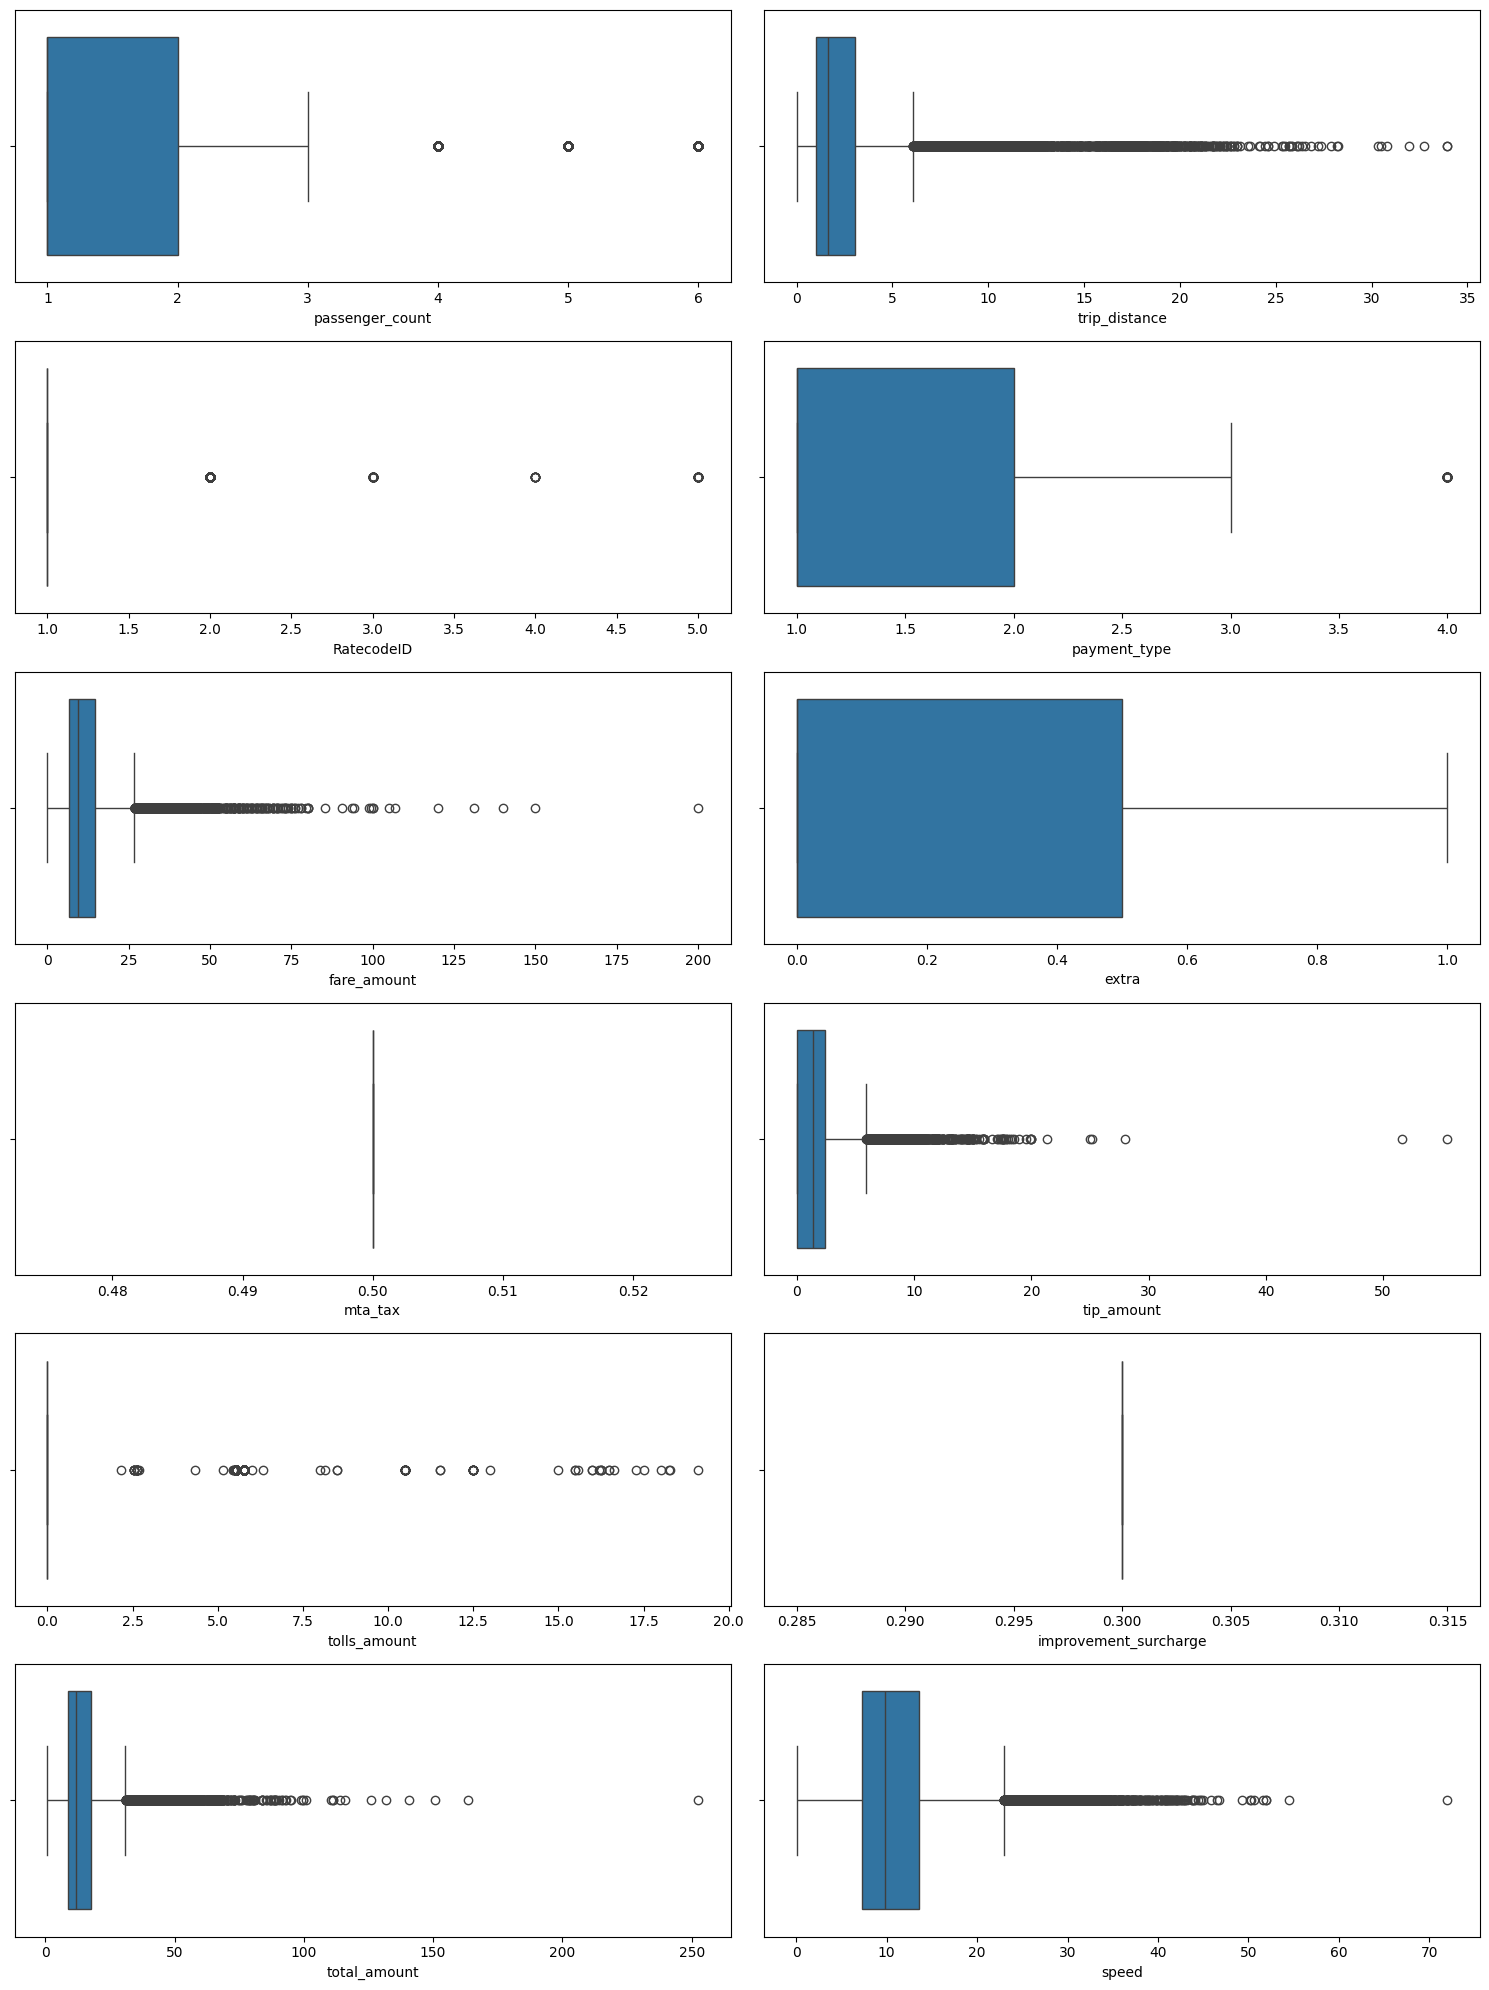

In [43]:
fig,axes=plt.subplots(6,2,figsize=(15,20))
sns.boxplot(ax=axes[0,0],x=df_cleaned['passenger_count'])
sns.boxplot(ax=axes[0,1],x=df_cleaned['trip_distance'])
sns.boxplot(ax=axes[1,0],x=df_cleaned['RatecodeID'])
sns.boxplot(ax=axes[1,1],x=df_cleaned['payment_type'])
sns.boxplot(ax=axes[2,0],x=df_cleaned['fare_amount'])
sns.boxplot(ax=axes[2,1],x=df_cleaned['extra'])
sns.boxplot(ax=axes[3,0],x=df_cleaned['mta_tax'])
sns.boxplot(ax=axes[3,1],x=df_cleaned['tip_amount'])
sns.boxplot(ax=axes[4,0],x=df_cleaned['tolls_amount'])
sns.boxplot(ax=axes[4,1],x=df_cleaned['improvement_surcharge'])
sns.boxplot(ax=axes[5,0],x=df_cleaned['total_amount'])
sns.boxplot(ax=axes[5,1],x=df_cleaned['speed'])
plt.tight_layout()
plt.show()

In [44]:
vendor_pass=df_cleaned.groupby('VendorID')['passenger_count'].sum()
vendor_pass

,passenger_count
VendorID,
1,12492
2,24287


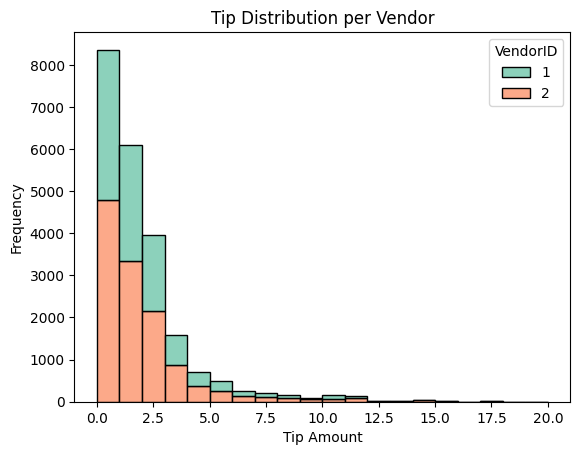

In [45]:
sns.histplot(data=df_cleaned, x='tip_amount', bins=range(0,21,1),hue='VendorID', multiple='stack', palette='Set2')
plt.title('Tip Distribution per Vendor')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()

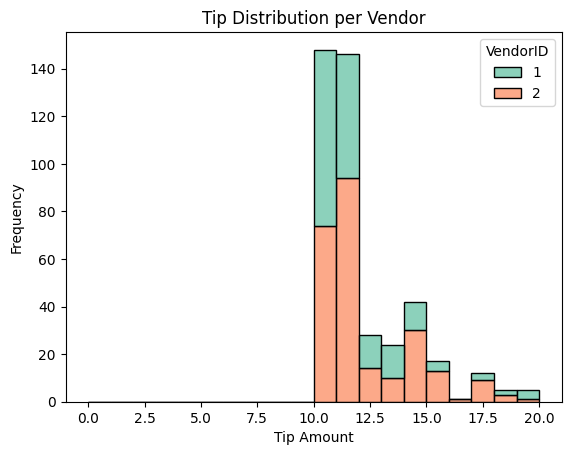

In [46]:
tip_above_10=df_cleaned[df_cleaned['tip_amount']>=10]
sns.histplot(data=tip_above_10, x='tip_amount', bins=range(0,21,1),hue='VendorID', multiple='stack', palette='Set2')
plt.title('Tip Distribution per Vendor')
plt.xlabel('Tip Amount')
plt.ylabel('Frequency')
plt.show()

Jumlah penumppang kedua lebih banyak dengan total 24287 (2x lipat dari vendor 1) dan penumpang vendor 2 lebih banyak memberikan tip pada driver sehingga perlu ditelusuri alasannya

Trip Amount Trend

**1. Per Month**

In [47]:
month_order=['January','February','March','April','May','June','July','August','September','October','November','December']
df_cleaned['month']=pd.Categorical(df_cleaned['month'], categories=month_order, ordered=True)
tip_month_avg=df_cleaned.groupby('month')['tip_amount'].mean().reset_index()
tip_month_avg.sort_values(['tip_amount'],ascending=False)

<ipython-input-47-8069921cb82e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_month_avg=df_cleaned.groupby('month')['tip_amount'].mean().reset_index()


,month,tip_amount
10,November,1.974647
4,May,1.896257
11,December,1.833120
1,February,1.822552
9,October,1.818185
5,June,1.809498
8,September,1.779428
3,April,1.758348
2,March,1.755711
0,January,1.748621


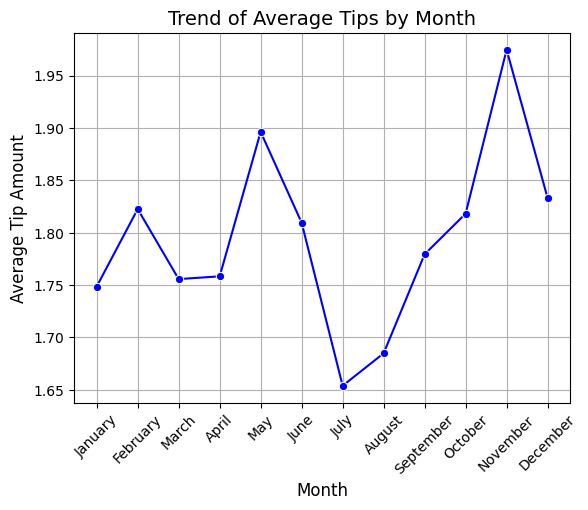

In [48]:
sns.lineplot(data=tip_month_avg.sort_values(['month']), x='month', y='tip_amount', marker='o', color='blue')

# Customize the plot
plt.title('Trend of Average Tips by Month', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Month', fontsize=12,)
plt.ylabel('Average Tip Amount', fontsize=12)
plt.grid(True)
plt.show()

Pemberian tips terbesar terjadi pada bulan Novemberdan terjadi peningkatan drastis dari bulan Juli hingga November.

**2. Per Day**

In [49]:
day_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_cleaned['day']=pd.Categorical(df_cleaned['day'],categories=day_order,ordered=True)
tip_day_avg=df_cleaned.groupby('day')['tip_amount'].mean().reset_index()
tip_day_avg.sort_values(['tip_amount'],ascending=False)

<ipython-input-49-214f0ac17c2f>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tip_day_avg=df_cleaned.groupby('day')['tip_amount'].mean().reset_index()


,day,tip_amount
3,Thursday,1.880581
2,Wednesday,1.874130
1,Tuesday,1.819442
0,Monday,1.819196
4,Friday,1.814089
6,Sunday,1.733731
5,Saturday,1.628748


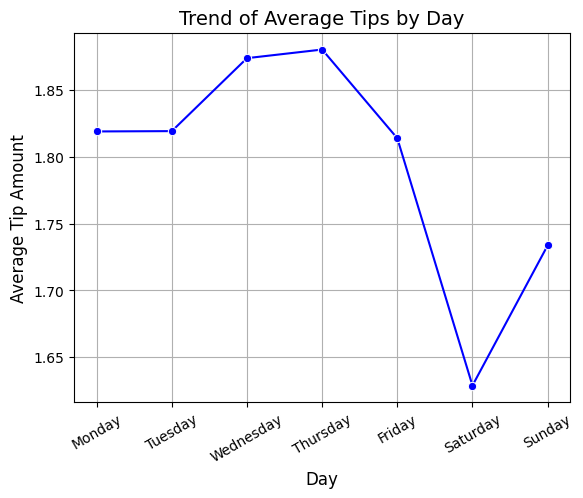

In [50]:
sns.lineplot(data=tip_day_avg.sort_values(['day']), x='day', y='tip_amount', marker='o', color='blue')

# Customize the plot
plt.title('Trend of Average Tips by Day', fontsize=14)
plt.xticks(rotation=30)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Average Tip Amount', fontsize=12)
plt.grid(True)
plt.show()

Pemberian tips terbesar adalah pada hari Rabu dan Kamis. Dapat diasumsikan kedua hari tersebut terdapat banyak penumpang sedangkan mendekati hari libur penumpang semakin sedikit

**3. Per Hour**

Pengaturan jam mengikuti waktu US


*   00.01-11.59: Morning
*   12.00: Noon
*   12.01-17.59: Afternoon
*   18.00-20.59: Evening
*   21.00-23.59: Night
*   24.00: Midnight







In [51]:
df_cleaned['time_group']=np.select([
        (df_cleaned['tpep_pickup_datetime'].dt.hour >= 0) & (df_cleaned['tpep_pickup_datetime'].dt.hour < 12),  # Morning
        (df_cleaned['tpep_pickup_datetime'].dt.hour == 12) & (df_cleaned['tpep_pickup_datetime'].dt.minute == 0),  # Noon (exactly 12:00)
        (df_cleaned['tpep_pickup_datetime'].dt.hour == 12) | (df_cleaned['tpep_pickup_datetime'].dt.hour > 12) & (df_cleaned['tpep_pickup_datetime'].dt.hour < 18),  # Afternoon
        (df_cleaned['tpep_pickup_datetime'].dt.hour >= 18) & (df_cleaned['tpep_pickup_datetime'].dt.hour < 21),  # Evening
        (df_cleaned['tpep_pickup_datetime'].dt.hour >= 21) & (df_cleaned['tpep_pickup_datetime'].dt.hour < 24), #Night
        (df_cleaned['tpep_pickup_datetime'].dt.hour == 24) # Midnight
    ], ['Morning','Noon','Afternoon','Evening','Night','Midnight']
)

<ipython-input-65-1bc78589e09a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=order_counts.index,y=order_counts.values, palette='viridis')


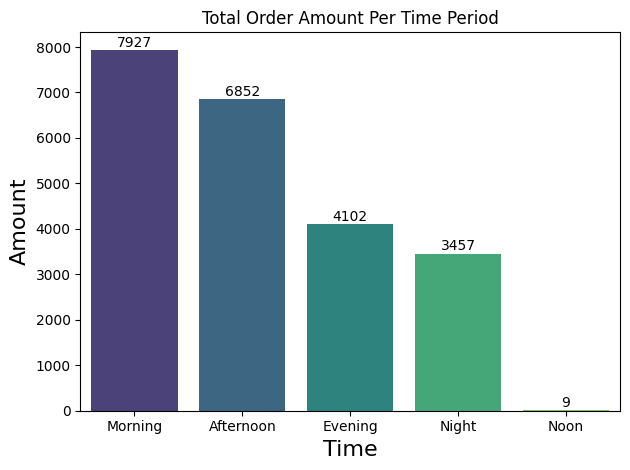

In [65]:
order_counts=df_cleaned['time_group'].value_counts()
ax=sns.barplot(x=order_counts.index,y=order_counts.values, palette='viridis')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height() + 5, f'{int(p.get_height())}',
            ha='center', va='bottom', fontsize=10)
plt.title('Total Order Amount Per Time Period')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Amount', fontsize=16)
plt.tight_layout()
plt.show()

Pelanggan terbanyak adalah pada pagi hari dengan total 7972. Mungkin saja hal ini disebabkan orang berangkat kerja banyak yang menggunakan taksi

<ipython-input-53-e8d64df47e0c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_tips.sort_values(['sum'],ascending=True),x='time_group', y='sum', palette='viridis', ax=axes[0])
<ipython-input-53-e8d64df47e0c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=time_tips.sort_values(['mean'],ascending=True),x='time_group', y='mean', palette='rocket_r', ax=axes[1])


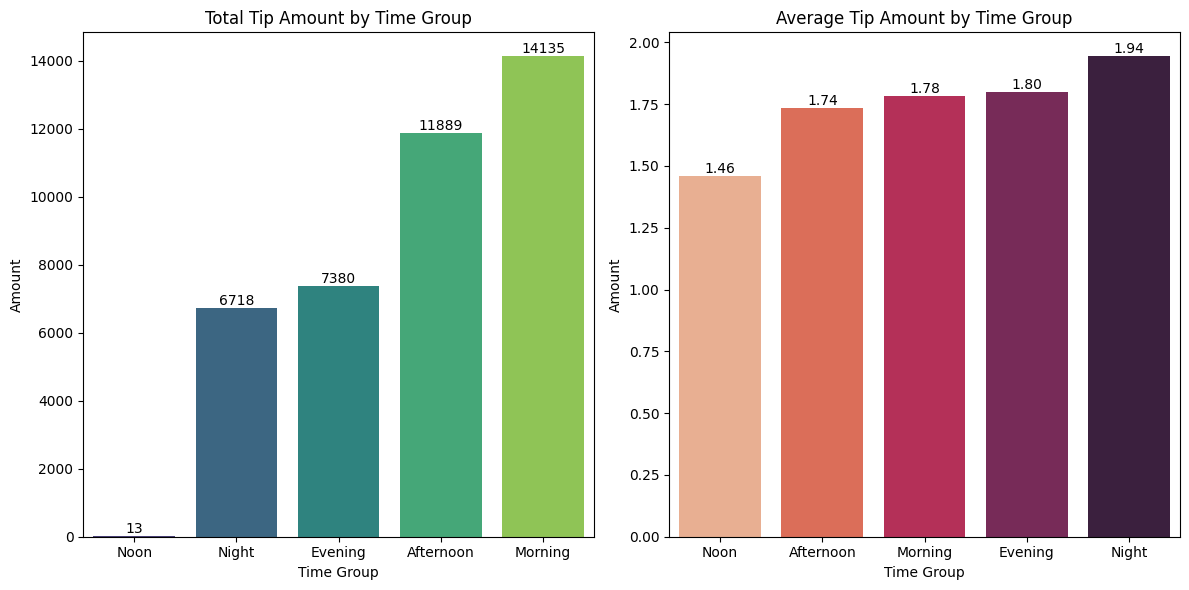

In [53]:
time_tips = df_cleaned.groupby('time_group')['tip_amount'].agg(['mean', 'sum']).reset_index()
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Mean Tip
sns.barplot(data=time_tips.sort_values(['sum'],ascending=True),x='time_group', y='sum', palette='viridis', ax=axes[0])
axes[0].set_title('Total Tip Amount by Time Group')
axes[0].set_ylabel('Amount')
axes[0].set_xlabel('Time Group')

# Menampilkan angka di atas setiap bar
for p in axes[0].patches:
    axes[0].text(p.get_x() + p.get_width()/2, p.get_height(), f'{int(p.get_height())}',
                 ha='center', va='bottom', fontsize=10)

# Plot Sum Tip
sns.barplot(data=time_tips.sort_values(['mean'],ascending=True),x='time_group', y='mean', palette='rocket_r', ax=axes[1])
axes[1].set_title('Average Tip Amount by Time Group')
axes[1].set_ylabel('Amount')
axes[1].set_xlabel('Time Group')

# Menampilkan angka di atas setiap bar
for p in axes[1].patches:
    axes[1].text(p.get_x() + p.get_width()/2, p.get_height(), f'{p.get_height():.2f}',
                 ha='center', va='bottom', fontsize=10)

# Menyesuaikan layout agar tidak berantakan
plt.tight_layout()
plt.show()

Secara jumlah tip, pagi hari memiliki jumlah tip terbanyak tetapi secara rata-rata night memiliki rata-rata terbanyak. Berdasarkan jumlah order yang masuk, dapat disimpulkan bahwa di pagi hari jumlah order lebih banyak namun nilai tip yang diberikan kecil, sedangkan di malam hari dengan jumlah order yang lebih sedikit namun nilai tip yang diberikan lebih besar.

In [54]:
df_cleaned['hour']=df_cleaned['tpep_pickup_datetime'].dt.hour
tip_groupby=df_cleaned.groupby('hour')['tip_amount'].agg(['mean', 'sum','count']).reset_index()

<ipython-input-70-fe75fb4376c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tip_groupby,x='hour', y='count', palette='Blues')


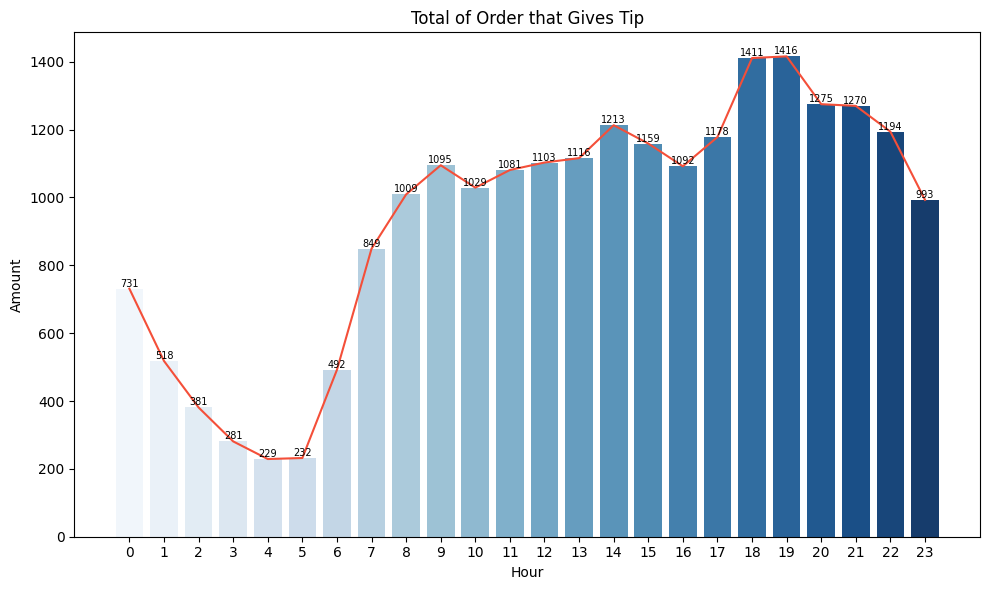

In [70]:
plt.figure(figsize=(10, 6))

sns.barplot(data=tip_groupby,x='hour', y='count', palette='Blues')
sns.lineplot(data=tip_groupby,x='hour', y='count',color=sns.color_palette('Reds')[3])

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height(),
             f'{int(p.get_height())}', ha='center', va='bottom', fontsize=7)
plt.title('Total of Order that Gives Tip')
plt.ylabel('Amount')
plt.xlabel('Hour')
plt.tight_layout()
plt.show()

Jam yang kemungkinan terbesar driver mendapatkan tip per perjalanan adalah pada jam 17 hingga 19.

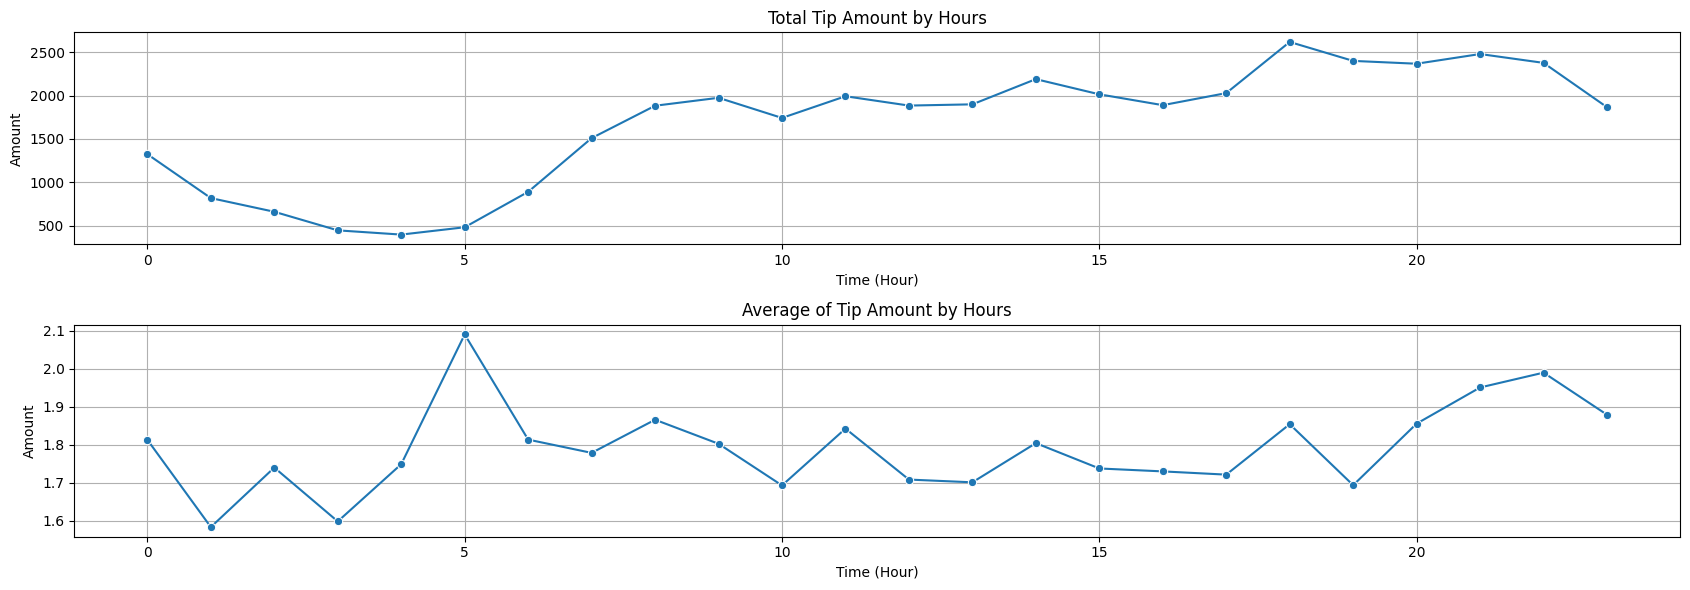

In [69]:
fig, axes = plt.subplots(2, 1, figsize=(17, 6))

sns.lineplot(data=tip_groupby,x='hour', y='sum', marker='o',ax=axes[0])
axes[0].set_title('Total Tip Amount by Hours')
axes[0].set_ylabel('Amount')
axes[0].set_xlabel('Time (Hour)')

sns.lineplot(data=tip_groupby,x='hour', y='mean', marker='o', ax=axes[1])
axes[1].set_title('Average of Tip Amount by Hours')
axes[1].set_ylabel('Amount')
axes[1].set_xlabel('Time (Hour)')

axes[0].grid()
axes[1].grid()
plt.tight_layout()
plt.show()

Berdasarkan trend yang ada,
sekitar jam 5 dan malam hari terdapat pemberian nilai

1.   Sekitar jam 5 dan malam hari terdapat pemberian nilai tip yang lebih besar. Hal ini juga diikuti dengan total tip yang meningkat untuk malam hari.
2.   Jumlah total tip meningkat seiring berjalannya waktu dengan puncaknya adalah malam hari


Relation of Distance, Duration, and Tip

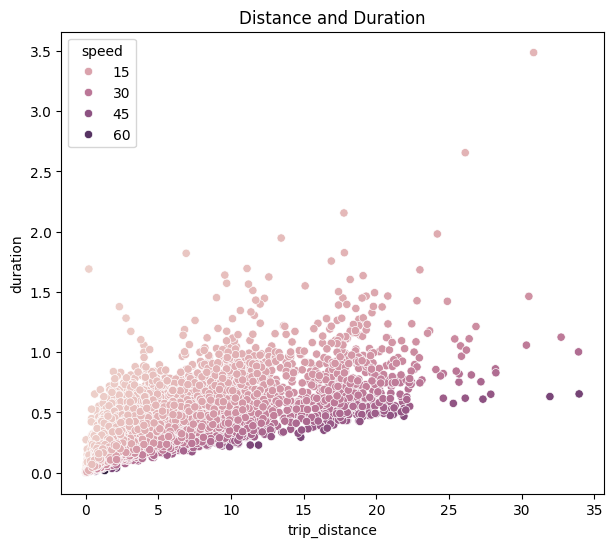

In [58]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x='trip_distance', y='duration', hue='speed', data=df_cleaned)
plt.title('Distance and Duration')
plt.show()

Semakin jauh perjalanan maka semakin lama waktu yang ditempuhkan juga dengan kecepatan semakin meningkat

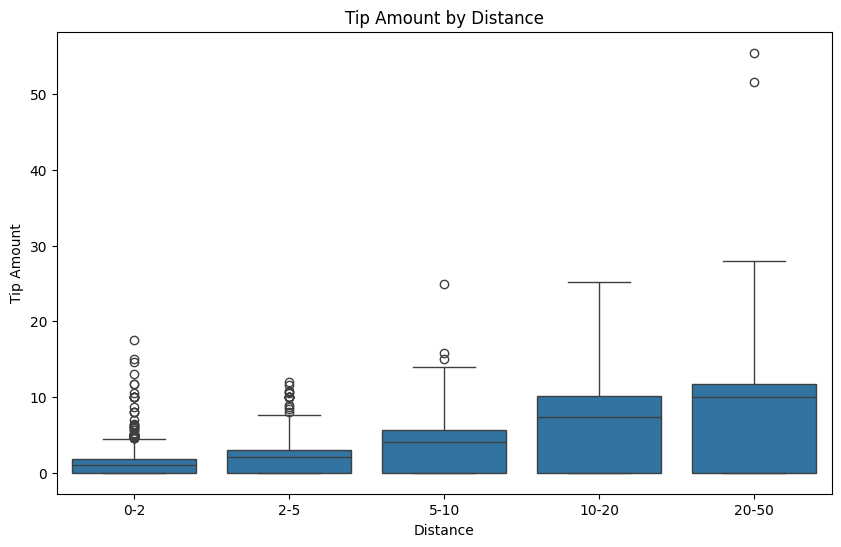

In [59]:
df_cleaned['distance_category'] = pd.cut(df_cleaned['trip_distance'], bins=[0, 2, 5, 10, 20, 50],
                                         labels=['0-2', '2-5', '5-10', '10-20', '20-50'])
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned, x='distance_category', y='tip_amount')

plt.xlabel('Distance')
plt.ylabel('Tip Amount')
plt.title('Tip Amount by Distance')
plt.show()

Semakin jauh perjalanan maka tip yang diberika juga semkain meningkat. Dapat dilihat pada rata-rata per kelompok yang semakin meningkat

Relation of Passenger and Tip

<ipython-input-71-88b252421478>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(tip_passenger, x='passenger_count', y='tip_amount', palette='viridis')


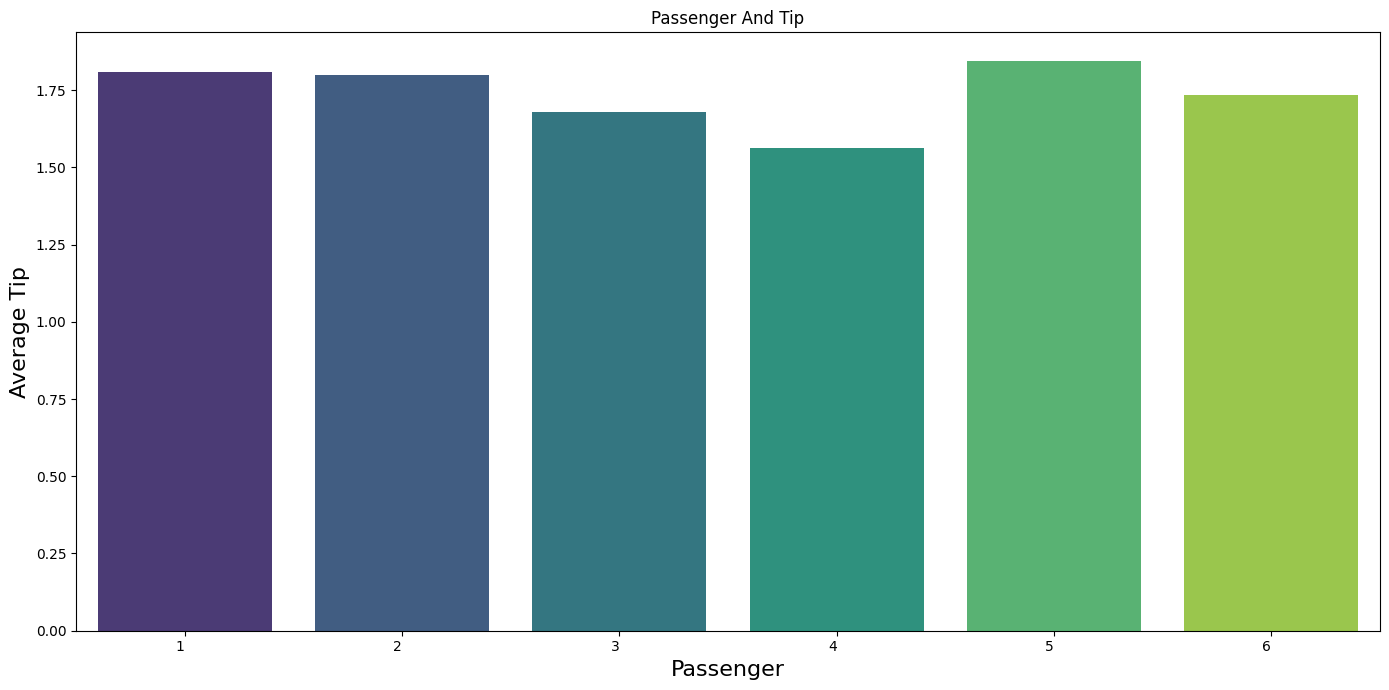

In [71]:
tip_passenger = df_cleaned.groupby('passenger_count')['tip_amount'].mean().reset_index()
#bar plot
plt.figure(figsize=(14, 7))

#categorical plot
sns.barplot(tip_passenger, x='passenger_count', y='tip_amount', palette='viridis')
#plt.xticks('Average Ladder Score by Region', fontsize=16, color='darkblue')
plt.xticks(ha='right', fontsize=10)
plt.xlabel('Passenger', fontsize=16)
plt.ylabel('Average Tip', fontsize=16)
plt.title('Passenger And Tip')
plt.tight_layout()
plt.show()

Jumlah passenger 5 cenderung memberikan tip terbanyak

Relation of Payment Type

<ipython-input-61-2ca7825ae714>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(tip_ratecode, x='RatecodeID', y='tip_amount', palette='viridis')


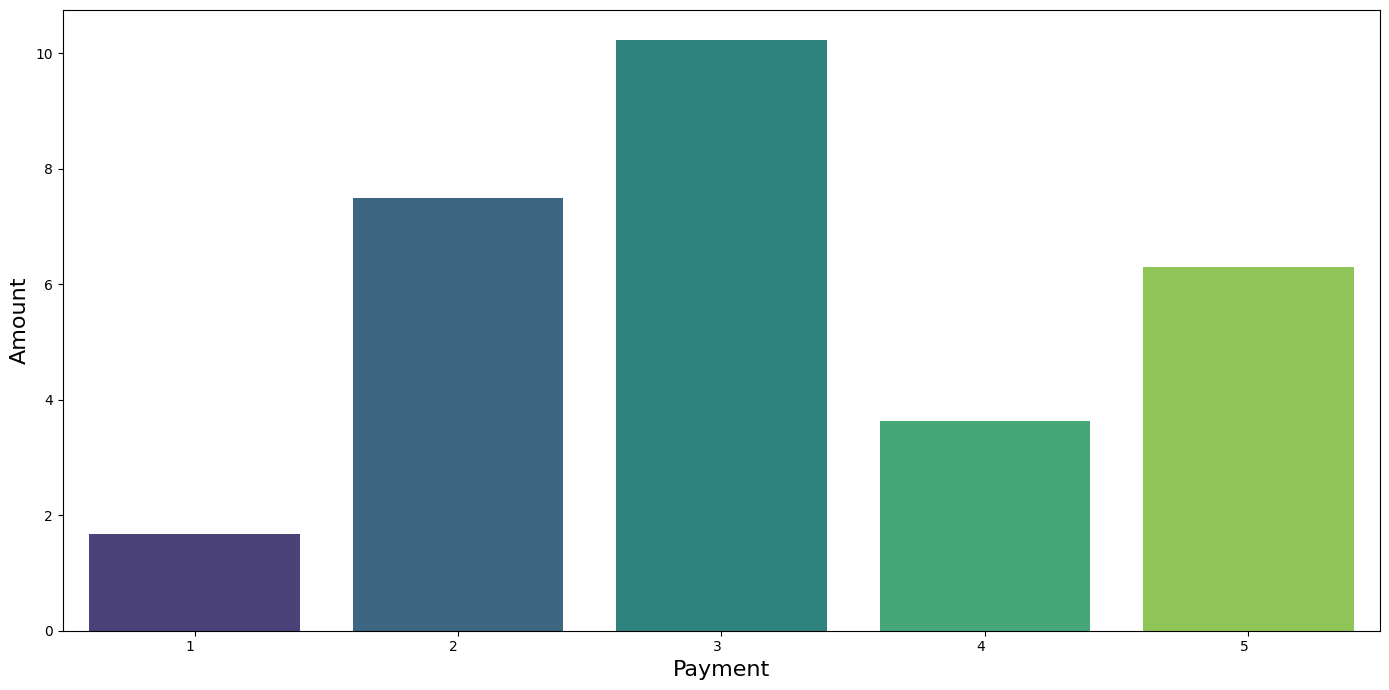

In [61]:
tip_ratecode = df_cleaned.groupby('RatecodeID')['tip_amount'].mean().reset_index()
#bar plot
plt.figure(figsize=(14, 7))

#categorical plot
sns.barplot(tip_ratecode, x='RatecodeID', y='tip_amount', palette='viridis')
#plt.xticks('Average Ladder Score by Region', fontsize=16, color='darkblue')
plt.xticks(ha='right', fontsize=10)
plt.xlabel('Payment', fontsize=16)
plt.ylabel('Amount', fontsize=16)
plt.tight_layout()
plt.show()

Jenis pembayaran 3 cenderung lebih memberikan tip lebih banyak

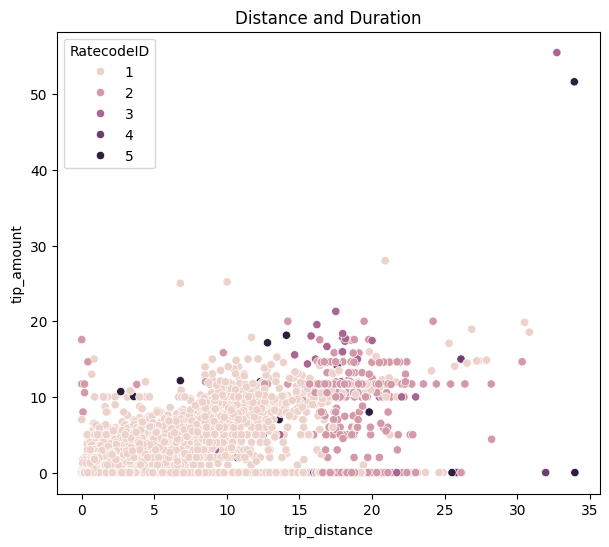

In [62]:
plt.figure(figsize=(7, 6))
sns.scatterplot(x='trip_distance', y='tip_amount', hue='RatecodeID', data=df_cleaned)
plt.title('Distance and Duration')
plt.show()

Mayoritas penumpang menggunakan Rate Code 1 yaitu Standard rate untuk jarak dibawah 20.

<ipython-input-63-09ed638115a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='RatecodeID', y='tip_amount', palette='husl')


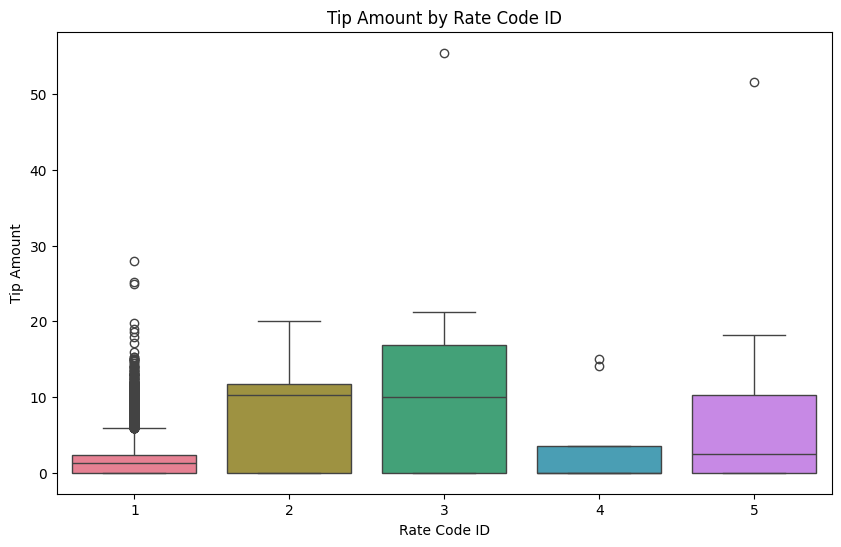

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned, x='RatecodeID', y='tip_amount', palette='husl')

plt.xlabel('Rate Code ID')
plt.ylabel('Tip Amount')
plt.title('Tip Amount by Rate Code ID')
plt.show()

**Conclusion**

1.   Vendor 2 lebih memiliki banyak passenger dan mendapat lebih banyak sehingga perlu dipelajari alasan maupun keunggulan.
2.   Tipe pembayaran 3 (No Charge) lebih banyak memberikan tip sehingga mungkin dengan adanya promo atau digratiskan, penumpang lebih tergerak untuk memberikan tip.
1.   Jika driver ingin mendapatkan total tip dan order yang banyak, maka disarankan untuk mengambil shift dari jam 6 pagi hingga 6 sore (terutama pagi hari)
2.   Jika driver lebih mengutamakan kualitas atau nilai tip yang lebih besar dengan order sedikit maka disarankan untuk mengambil shift di pagi hari (jam 4-6) dan malam hari (jam 20-22)



